In [1]:
from matplotlib import pyplot as plt
from pandas import DataFrame, read_table
from QuadraticAprox.LDE import Approx
from numpy import linspace

In [2]:
points = linspace(-1, 1, 7)
N = 3

In [3]:
approx = Approx(points, N, p=lambda x:x, g=lambda x:1, f=lambda x:2*x)

In [4]:
approx.coefficients()

array([ 1.65629056, -1.12456697,  0.14692288])

In [5]:
plotPoints = linspace(-3, 3, 100)

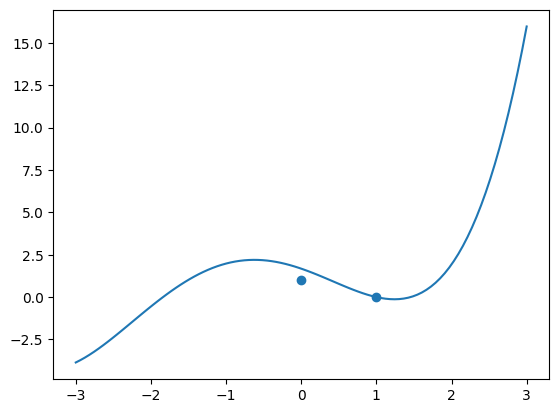

In [6]:
plt.plot(plotPoints, [ approx(x) for x in plotPoints ])
plt.scatter([0, 1], [1, 0])